# Alingment of the glass

When we try to calculate X and Y positon error using glass scale we need to know the location of the glass holes or circles. So we can go to those locations and get the position error values. So we need a method to locate all the dots locations. The problem is when we place the glass scale in the stage it can be rotate along the Z axis and can be missalling with XY of the stage. 

Anyhow we cannot priceliy alling the XY stage axis glass XY axis so we need a way to get the actual orentation of the glass scale. I suggest we have to locatate the (0,0) point of the glass and far end point (n,n) point manualy. With the actual feedback point we can back calculate the glass dots location indivually. 

This notebook will discuss the process of getting the position array of dots.

In [110]:
import matplotlib.pyplot as plt
import math
import numpy as np


We have get 0,0 point in (x_0_fb,y_0_fb) 
and 23 cycles in x direction and 23 cycles y direction up we have (location_23,location_23) in (x_23_fb,y_23_fb) 

Lets calculate the the distance bitween cycles/dots

In [121]:
#step_x = 0.3798
#step_y = 0.421
steps = 23


# Position feedback of (0,0) point
x_0_fb  = -1.9903
y_0_fb  = 83.57

# position feedback of (n,n) point
x_23_fb = -10.704
y_23_fb = 93.2589

x_023_fb = -11.1916
y_023_fb = 84.0576

x_2323_fb = -1.5027
y_2323_fb = 92.7713


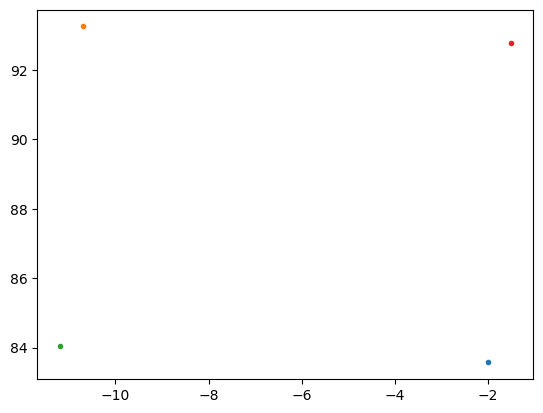

In [108]:
# visualise the locaiton 

plt.scatter(x_0_fb,y_0_fb,marker=".")
plt.scatter(x_23_fb,y_23_fb,marker=".")
plt.scatter(x_023_fb,y_023_fb,marker=".")
plt.scatter(x_2323_fb , y_2323_fb,marker=".")

plt.show()

lets consider distance bitween dots is 'step-distance'
in we have 23 steps from (0,0) dot to (23,23) dot 

$\sqrt{(x_{23fb} - x_{0fb})^2 + (y_{23fb} - y_{0fb})^2 } = \sqrt{(23 \times step-distance)^2 + (23 \times step-distance)^2 } $
$  = \sqrt(2) \times 23 \times step-distance $

By solving this we can calculate the step distance as bellow

$ step-distance = {{ \sqrt{(x_{23fb} - x_{0fb})^2 + (y_{23fb} - y_{0fb})^2 } } \over {\sqrt(2) \times 23} }$

In [8]:
# use pythergerus rule to calculate distance 
# 
# math.sqrt((23x)*(23x)+(23x)*(23x)) = math.sqrt(2)*23x 

step_distance = math.sqrt((x_23_fb - x_0_fb)*(x_23_fb - x_0_fb) + (y_23_fb - y_0_fb)*(y_23_fb - y_0_fb)) / (math.sqrt(2)*23)

print("step-distance = ", step_distance)

step-distance =  0.4006178485614582


## Angle bitween two coodinate frames

angle 135 is calculated based on the our current setup


$ tan(135 -\theta) = { {y_{23fb} - y_{0fb}} \over {{x_{23fb} - x_{0fb}}} } $



In [98]:
theta = 135 - math.degrees(math.atan((y_23_fb - y_0_fb)/(x_23_fb - x_0_fb)))
theta_rad = 3*math.pi/4 - math.atan((y_23_fb - y_0_fb)/(x_23_fb - x_0_fb))
print ("angle theta = ",theta)

angle theta =  183.0334099221834


## 0,23 point calculation

In [99]:
print(23*step_distance*math.cos(theta_rad)+x_0_fb, -23*step_distance*math.sin(theta_rad)+y_0_fb)

-11.191600000000003 84.0576


# 23,0 point calculation

In [105]:
print(-23*step_distance*math.cos(theta_rad)+x_23_fb, 23*step_distance*math.sin(theta_rad)+y_23_fb)

-1.5026999999999973 92.7713


## Create a location matrix to store the dot position

In [152]:
# rows contanin no of dots in x direction
# column contain number of dots in Y direction 

rows = 23
column = 23

location = np.zeros((2,rows+1,column))
#A
location[0,0,0] = -1.9903
location[1,0,0] = 83.57
#B
location[0,0,23] = -11.1916
location[1,0,23] = 84.0576
#D
location[0,23,0] = -1.5027
location[1,23,0] = 92.7713
#C
location[0,23,23] =-10.704
location[1,23,23] =93.2589



In [156]:
hight_x = (location[0,23,0] - location[0,0,0])/23 
hight_y = (location[1,23,0] - location[1,0,0])/23 
step_x = (location[0,0,23] - location[0,0,0])/23
step_y = (location[1,0,23] - location[1,0,0])/23

for rows in range (0,24,1):
    for column in range (0,24,1):
        location[0,rows,column] = location[0,0,0] + step_x*column  + hight_x*rows       # X axis
        location[1,rows,column] = location[1,0,0] + step_y*column  + hight_y*rows       # Y axis



0.0212 0.4000565217391306


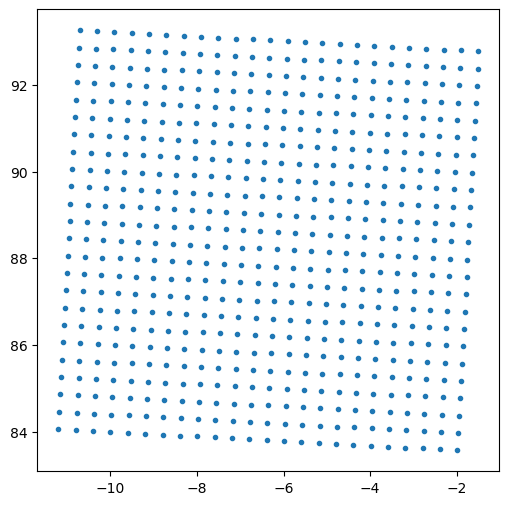

In [157]:
# plot the locations
plt.figure(figsize=(6,6))
plt.scatter(location[0,:,:], location[1,:,:],marker=".")
# Set the aspect of the plot to be equal, ensuring equal physical spacing
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [163]:
# print to file

#np.savetxt('data.txt', location)
for axis in range (0,2,1):
    print("location[",axis,",",rows,",",column,"]=[%.2f" %location[axis,rows,column],"]")

SyntaxError: invalid syntax (492588396.py, line 5)

## Second method without angle

Lets take step distance as 0.4 mm

Now we need to find the follwing (0,23) location and (23,0) location

Lets create line bitween x_0_fb,y_0_fb and x_23_fb,y_23_fb. Then create right angeld line at the center of the previous line for that then drow a cercle crossing all x_0_fb,y_0_fb and x_23_fb,y_23_fb. The crossing point of the right angled line with the circle is the (0,23) location and (23,0) location. 


In [87]:
#X_val = [x_0_fb,x_23_fb ]
#Y_val = [y_0_fb,y_23_fb] 
#
#plt.plot(X_val,Y_val,marker=".")
#plt.show()

#M = (y_23_fb - y_0_fb)/(x_23_fb - x_0_fb )
##print (M)
#C = y_0_fb - M*x_0_fb
##print (C)
#print ("Y = ",M,"X +",C)
#
#
## creating perpendiculer line going in the center of the mesured loation 
#
#mid_point = [(x_23_fb + x_0_fb)/2 , (y_23_fb + y_0_fb)/2]
#print(mid_point[0],mid_point[1])
#
#M2 = -1/M
#C2 =mid_point[1] - M2*mid_point[0]
#print("Y =",M2,"X + ", C2)
#